In [72]:
# Импорт библиотек
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [73]:
if not os.path.exists('../Dataset_Placement_Data_Full_Class'): os.mkdir("../Dataset_Placement_Data_Full_Class")

!curl -o ../Dataset_Placement_Data_Full_Class/Placement_Data_Full_Class/csv https://drive.google.com/file/d/1doGTx7MvdZppSYHXxgsnQn8FoUX3d_H7/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file 
100  1377    0  1377    0     0   3416      0 --:--:-- --:--:-- --:--:--  3408
curl: (23) Failed writing body (0 != 1377)


In [74]:
# Обращение к данным
ds=pd.read_csv('/content/drive/MyDrive/Dataset_Placement_Data_Full_Class/Placement_Data_Full_Class.csv')
ds

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [75]:
# Вывод информации по признакам и DataFrame
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [76]:
# Проверка на наличие пропусков в признаках
df.isnull().sum()

Actual       0
Predicted    0
dtype: int64

In [77]:
# Количество дублирующихся записей
print('Количество дублирующихся записей:', ds.duplicated().sum())

Количество дублирующихся записей: 0


In [78]:
# Проверка корреляции
df.corr()

,Actual,Predicted
Actual,1.000000,0.392257
Predicted,0.392257,1.000000


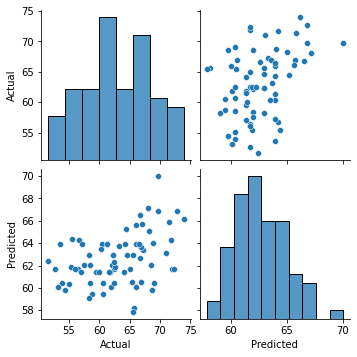

In [79]:
# Визуализация данных
sns.pairplot(df)

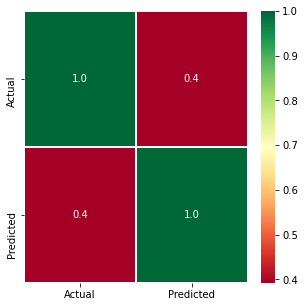

In [80]:
# Визуализация матрицы корреляции: построение корреляционной карты
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.1f',ax=ax);

In [81]:
# Изменение формы массива без изменения данных
X=ds.iloc[:,7].values.reshape(-1,1)
Y=ds.iloc[:,12].values.reshape(-1,1)

In [84]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=1/3, random_state=0)

In [85]:
# Обучение модели
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
# Прогнозирование результатов тестового набора
y_pred=regressor.predict(X_test)

In [87]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,71.96,61.702928
1,55.47,61.895529
2,62.36,62.986935
3,58.79,59.455916
4,66.04,63.949940
...,...,...
67,74.01,66.152012
68,56.70,64.270942
69,57.24,63.949940
70,66.88,60.547322


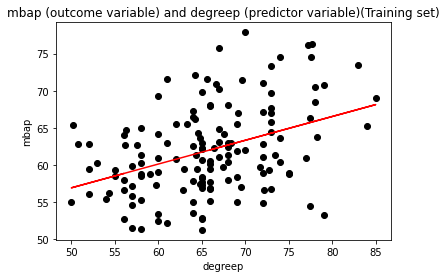

In [88]:
# Визуализация результатов тренировочного набора
plt.scatter(X_train, Y_train, color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('mbap (outcome variable) and degreep (predictor variable)(Training set)')
plt.xlabel('degreep')
plt.ylabel('mbap')
plt.show()

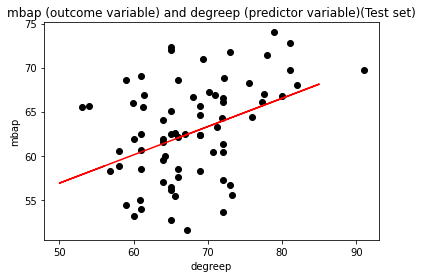

In [89]:
# Визуализация результатов тестового набора
plt.scatter(X_test,Y_test,color='black')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('mbap (outcome variable) and degreep (predictor variable)(Test set)')
plt.xlabel('degreep')
plt.ylabel('mbap')
plt.show()